<a href="https://colab.research.google.com/github/CristianS1988/ENSAYOGIT/blob/main/Laboratorio1SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hola mundo")

Hola mundo


In [2]:
# Importando paquetes
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Importando datos

In [14]:
df = pd.read_csv("Laboratorio1.csv")
# un vistazo dentro del set de datos
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


**Exploración de datos**
Tengamos primero una exploración descriptiva de nuestros datos.

In [11]:
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para explorar más en detalle.

In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


podemos dibujar cada una de estas características:

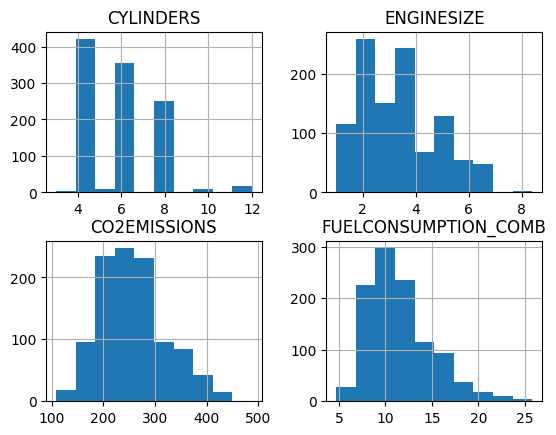

In [13]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora, comparemos estas características anteriores con la emisión de carbono, para ver cuán lineal es la regresión:

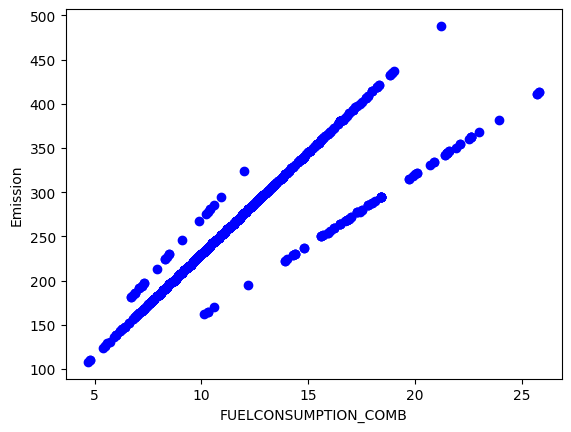

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

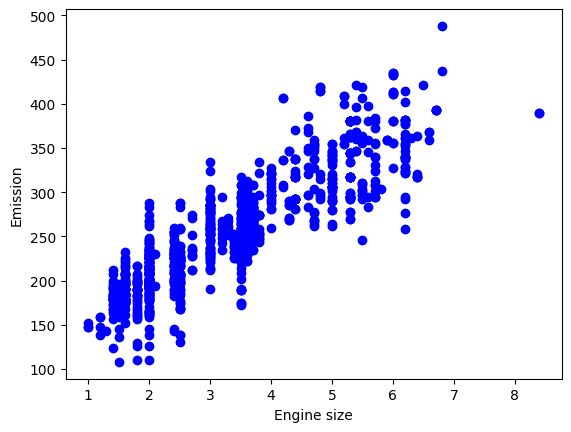

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Práctica**
dibuja CYLINDER vs la Emisión, para ver cuán lineal es su relación:

Creando el set de datos de entrenamiento y de prueba
Train/Test Split divide el dataseet en un set de training y otro de testing, siendo excluyentes. Después de ello, entrenamos con el set de training y pruebas con el de testing.

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Modelo de Regresión Simple
La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, …, Bn) para minimizar la ‘suma residual de cuadrados’ entre la x independiente del dataset y la dependiente y por la aproximación lineal.

Entrenar distribución de los datos

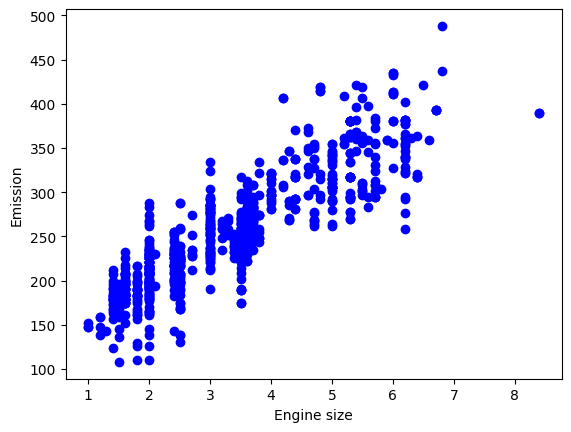

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling
Usando el paquete sklearn para modelar datos.

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.27688875]]
Intercept:  [124.85069822]


Trazar las salidas
podemos marcar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

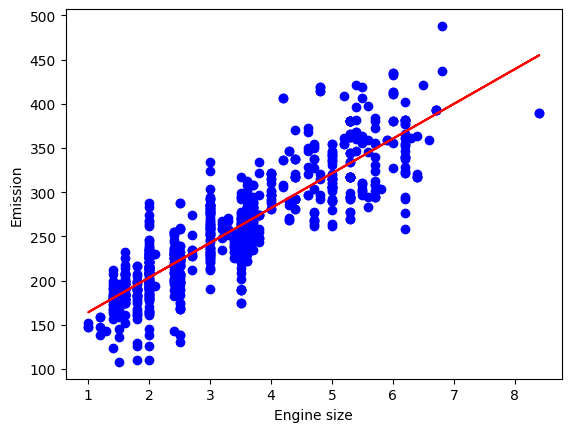

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluación
comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee conocimiento profundo en áreas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba:
- Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
- Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
- Error Cuadrático Medio (RMSE).
- R-cuadrática no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 22.31
Suma residual de los cuadrados (MSE): 807.68
R2-score: 0.70


Reto
1. Utilice el algoritmo K-fold cross validation e indique el polinomio que tenga mejor precisión.

In [24]:
from sklearn.model_selection import cross_val_score

best_degree = 0
best_score = float('-inf')

for degree in range(1, 6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, train[['ENGINESIZE']], train['CO2EMISSIONS'], cv=5)
    
    if scores.mean() > best_score:
        best_degree = degree
        best_score = scores.mean()

print(f"El mejor grado es {best_degree} con un score R2 de {best_score}")

El mejor grado es 3 con un score R2 de 0.7565898529907813


2.Analice las variables e implemente un modelo de regresión múltiple que mejore la predicción del modelo.

In [26]:
# Modelo de regresión lineal
multi_regr = linear_model.LinearRegression()

# Ajustar el modelo utilizando 'ENGINESIZE', 'CYLINDERS' y 'FUELCONSUMPTION_COMB' como variables independientes
multi_regr.fit(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']], train['CO2EMISSIONS'])

print('Coefficients: ', multi_regr.coef_)
print('Intercept: ', multi_regr.intercept_)

# Modelo para hacer predicciones
predicted_emissions = multi_regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

# evaluar el modelo
print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_emissions - test['CO2EMISSIONS'])))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_emissions - test['CO2EMISSIONS']) ** 2))
print("R2-score: %.2f" % r2_score(predicted_emissions , test['CO2EMISSIONS']))


Coefficients:  [10.4422544   7.65012063  9.89122595]
Intercept:  62.67206669737175
Mean absolute error: 17.10
Residual sum of squares (MSE): 559.81
R2-score: 0.83


3. Cuales son las variables poco significativas en el diseño del modelo?

statsmodels  es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos. Hay disponible una lista extensa de estadísticas de resultados para cada estimador. Los resultados se comparan con paquetes estadísticos existentes para garantizar que sean correctos. El paquete se publica bajo la licencia BSD modificada de código abierto (3 cláusulas). La documentación en línea está alojada en statsmodels.org .

In [27]:
import statsmodels.api as sm

# Añadir una constante al conjunto de entrenamiento
X = sm.add_constant(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

# Se crea un modelo OLS (Ordinary Least Squares)
model = sm.OLS(train['CO2EMISSIONS'], X)

# Ajustamos el modelo
results = model.fit()

# Mostrar los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1901.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        21:46:42   Log-Likelihood:                -3919.0
No. Observations:                 858   AIC:                             7846.
Df Residuals:                     854   BIC:                             7865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   62.6721 